In [21]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
tweets_data_path='./twitter data/twitter_trade_data.txt'
tweets_trade_data = []
tweets_file = open(tweets_data_path, "r")

#process each line in raw tweets file
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_trade_data.append(tweet)
    except:
        continue

In [126]:
len(tweets_trade_data)

35758

In [24]:
tweets_trade_data[1]

{'created_at': 'Tue Dec 04 01:55:29 +0000 2018',
 'id': 1069772145184522240,
 'id_str': '1069772145184522240',
 'text': "RT @rameshlaus: #Hollywood Trade Publication #Deadline covers #2Point0 's ₹ 400 Crs ($60.1 Million) WW Opening Weekend Gross.. \n\nhttps://t.…",
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 299161925,
  'id_str': '299161925',
  'name': 'Godson 2.0',
  'screen_name': 'selvarat2k1',
  'location': 'India, Tamilnadu',
  'url': None,
  'description': 'POLITICS...Make it Simple... Humble... and Constructive... The name is Makkal Thalaivar Rajinikanth... Cheers!',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 254,
  'friends_count': 15,
  'listed_count': 1,
  'favourites_coun

In [127]:
trade_tweets = pd.DataFrame()
trade_tweets['text'] = [p['text'] for p in tweets_trade_data]
trade_tweets['user name'] = [p['user']['name'] for p in tweets_trade_data]
trade_tweets['location'] = [p['user']['location'] for p in tweets_trade_data]
trade_tweets['followers count'] = [p['user']['followers_count'] for p in tweets_trade_data]
trade_tweets['description'] = [p['user']['description'] for p in tweets_trade_data]
trade_tweets['url'] = [p['entities']['urls'] for p in tweets_trade_data if p['entities']['urls'] != None]
trade_tweets['hashtags'] = [p['entities']['hashtags'] for p in tweets_trade_data]
trade_tweets['user_mentions'] = [p['entities']['user_mentions'] for p in tweets_trade_data]

In [10]:
trade_tweets.head()

,text,user name,location,followers count,description,url,hashtags,user_mentions
0,RT @MarkSimoneNY: Saturday China made concessi...,BigCatMEM87,TN,329,"Father, Former Tiger #87, 85-90. Proud Father ...",[],[],"[{'screen_name': 'MarkSimoneNY', 'name': 'MARK..."
1,RT @rameshlaus: #Hollywood Trade Publication #...,Godson 2.0,"India, Tamilnadu",254,POLITICS...Make it Simple... Humble... and Con...,[],"[{'text': 'Hollywood', 'indices': [16, 26]}, {...","[{'screen_name': 'rameshlaus', 'name': 'Ramesh..."
2,RT @AmoneyResists: The tariff rate was 15% bac...,Bbarber,None,491,None,[],[],"[{'screen_name': 'AmoneyResists', 'name': 'And..."
3,The best way China and the US can meet their r...,Global Analytica,Worldwide,266,"Providing insightful analysis, interviews and ...","[{'url': 'https://t.co/PIg3GtUOkP', 'expanded_...",[],[]
4,"RT @suilee: As part of the Trump-Xi meeting, C...",Maggie Lewis 陸梅吉,"New Jersey, USA",2027,Professor @SetonHallLaw Former Senior Scholar ...,[],[],"[{'screen_name': 'suilee', 'name': 'Sui-Lee We..."


## hashtag

In [121]:
hashtags=[]
for i in range(len(tweets_trade_data)):
    if tweets_trade_data[i]['entities']['hashtags']!=[]:
        a=tweets_trade_data[i]['entities']['hashtags']
        for j in range(len(a)):
            hashtags.append(a[j]["text"])
        #hashtags.append(tweets_trade_data[i]['entities']['hashtags'][0]["text"])
    else:
        hashtags.append("None")

len(hashtags)


40084

In [123]:
hashtags=[]
for i in range(len(tweets_trade_data)):
    a=tweets_trade_data[i]['entities']['hashtags']
    if a:
        hashtext=[a[j]['text'] for j in range(len(a))]
        for tag in hashtext:
            hashtags.append(tag)
        #hashtags.append(tweets_trade_data[i]['entities']['hashtags'][0]["text"])
    #else:
        #hashtags.append("None")

len(hashtags)

8389

In [124]:
hashtags_new=[x for x in hashtags]
hashtag_df=pd.DataFrame(hashtags_new)
hashtag_df[0].value_counts()[0:20]

China           682
Trump           452
Huawei          303
泛亚              222
昆明              222
云南              222
中共              222
US              189
Trumponomics    183
MAGA            182
ivory           152
TariffMan       140
Winning         122
trade           117
BREAKING         91
TradeWar         83
Dow              82
Iran             60
BeltandRoad      58
TradeWars        57
Name: 0, dtype: int64

## top authoritative users

In [14]:
top_user=trade_tweets[['user name','followers count']]
len(top_user)

35758

In [128]:
eco=trade_tweets[trade_tweets['user name']=='The Economist']

In [129]:
eco

,text,user name,location,followers count,description,url,hashtags,user_mentions


In [134]:
for i in range(len(tweets_trade_data)):
    if tweets_trade_data[i]['user']['name']=='The Economist':
        print(i)

In [16]:
users=top_user.groupby(['user name']).max().sort_values('followers count',ascending=False)
users[0:15]

,followers count
user name,
CNN Breaking News,54469239
The New York Times,42418269
CNN,40861723
Reuters Top News,20033073
The Wall Street Journal,16198163
TIME,15590244
ABC News,13987970
The Washington Post,13129229
The Associated Press,13056892


## text

In [22]:
all_text_data=trade_tweets[['text']]

all_text_words = ' '
for val in all_text_data['text']: 
    for words in str(val).split():
        all_text_words = all_text_words + words.lower() + ' '

In [99]:
import re
import string
#from wordcloud import WordCloud, STOPWORDS 
#stopwords = set(STOPWORDS)

from nltk.corpus import stopwords

a=tweets_trade_data[1]['text']

result = re.sub(r"@\S+|http\S+|rt|RT|#\S+", "", a)
for i in result.strip().split():
    print(i)
words=[word.lower() for word in stripped if word.isalpha()]
#table = str.maketrans('', '', string.punctuation)
#stripped = [w.translate(table) for w in result.split()]
clean_words = [w for w in words if not w in stopwords.words('english')]
clean_words

Trade
Publication
covers
's
₹
400
Crs
($60.1
Million)
WW
Opening
Weekend
Gross..


['saturday',
 'china',
 'made',
 'concessions',
 'president',
 'trump',
 'theyll',
 'reduce',
 'tariffs',
 'also',
 'buy',
 'us',
 'products']

In [81]:
## all the tweets
import nltk
import string
import re
import collections
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

result = re.sub(r"@\S+|http\S+|rt", "", all_text_words) #remove @ link
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in result.split()] 
words=[word for word in stripped if word.isalpha()] #remove punctuation
clean_words = [w for w in words if not w in stopwords] #remove stopwords

NameError: name 'all_text_words' is not defined

In [32]:
wordcount={}
for word in clean_words:
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1

print("Top 15 words in all tweets: \n")
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(15):
    print(word, ": ", count) 

Top 15 words in all tweets: 

trade :  17252
china :  12535
trump :  7554
us :  7205
war :  5529
huawei :  4199
president :  3213
chinese :  3149
uschina :  2725
arrest :  2481
deal :  2352
deficit :  2269
donald :  2259
dow :  2055
talks :  2053


In [72]:
# tfidf
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
tfidf_clean=[]
for i in range(len(tfidf_text)):
    # filter out punctuation
    text=tfidf_text[i]
    tokens = word_tokenize(text)
    # convert to lower case
    tokens=[w.lower() for w in tokens]
    words = [word for word in tokens if word.isalpha()]
    # lemmatize the data
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    tfidf_clean.append(' '.join(word for word in stemmed))

In [74]:
# all retweet text
tfidf_text=[]
for t in retweets:
    if 'extended_tweet' not in t:
        tfidf_text.append(t['text'])
    else:
        tfidf_text.append(t['extended_tweet']['full_text'])


## url

In [33]:
url=[]
for i in range(len(tweets_trade_data)):
    if tweets_trade_data[i]['entities']['urls']!=[]:
        url.append(tweets_trade_data[i]['entities']['urls'][0]["url"])
    else:
        url.append("None")

len(url) #35758

35758

In [34]:
print("Top urls in tweets: \n")
url_df=pd.DataFrame(url)
url_df[0].value_counts()[0:10]

Top urls in tweets: 



None                       21301
https://t.co/aklAnPBqYV      169
https://t.co/Qc4JGiftDy      144
https://t.co/k0SF9hH3mW      112
https://t.co/k0SF9hprYm      110
https://t.co/XdJgpQpL1I      102
https://t.co/KZEiBixtw4       87
https://t.co/O7KuVGIsE5       85
https://t.co/QBpJI4o7Ua       80
https://t.co/VEqZj30OE9       76
Name: 0, dtype: int64

## retweets

In [55]:
tweets_data_path='./twitter data/twitter_trade_data.txt'
retweets = {}
fh = open(tweets_data_path, 'r')
for line in fh:
    try:
        retweet = json.loads(line)
    except:
        continue
    if 'retweeted_status' not in retweet:
        continue
    rt = retweet['retweeted_status']
    if rt['retweet_count'] < 1000:
        continue
    retweets[rt['id_str']] = rt
    # convert to list
retweets = [retweets[w] for w in retweets.keys()]
    # sort by retweet count
retweets.sort(key=lambda x: -x['retweet_count'])

In [68]:
for t in retweets[0:10]:
    print ('['+ t['user']['screen_name'] + ']: ' + t['text'] + \
    ' [' + str(t['retweet_count']) + ' retweets]'+'\n')

[realDonaldTrump]: President Xi and I have a very strong and personal relationship. He and I are the only two people that can bring ab… https://t.co/eyJGyAO5qH [14347 retweets]

[realDonaldTrump]: “China officially echoed President Donald Trump’s optimism over bilateral trade talks. Chinese officials have begun… https://t.co/fO6YArC2ah [13911 retweets]

[brianklaas]: International security crisis in Ukraine; US firing tear gas into Mexico; a chemical weapons attack in Syria; up to… https://t.co/apoPpIebO3 [6046 retweets]

[realDonaldTrump]: Now that George Bush is campaigning for Jeb(!), is he fair game for questions about World Trade Center, Iraq War and eco collapse? Careful! [6022 retweets]

[wesley_jordan]: Trump's tariffs have cost GM $1 billion, forcing them to lay off 14K workers &amp; close 5 plants. Now, he's attacking… https://t.co/1Ig5xyoK3o [5499 retweets]

[ImranKhanPTI]: The failed attack against the Chinese Consulate was clearly a reaction to the unprecedented trade agre

## Word cloud

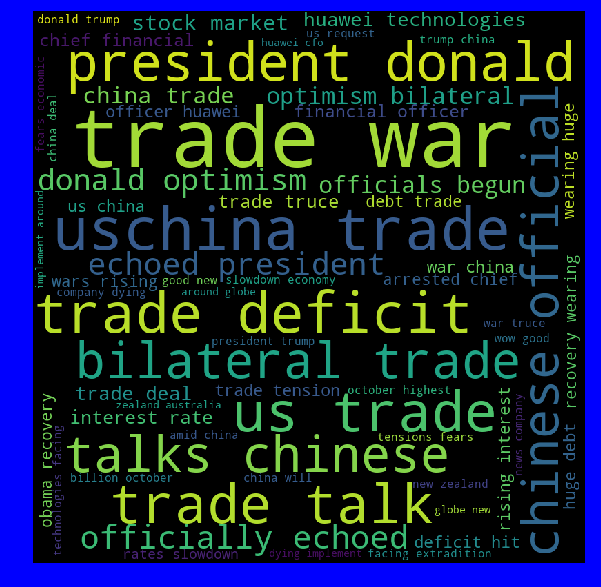

In [37]:
plot_words=" ".join(clean_words)
wordcloud = WordCloud(width = 800, height = 800, background_color ='black', 
                      stopwords = stopwords, min_font_size = 15).generate(plot_words) 
  
# plot wordcloud image                      
plt.figure(figsize = (8, 8), facecolor = 'blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 